# DataRes Fall 2022 Draft 2

### Team Poppin 

Morgan Chan

In [1]:
#standard imports
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, date
import plotly.express as px

In [3]:
#import dataframe
data = pd.read_csv("poppinuser.csv")
data = data.drop(labels=["disabledMessageCategories","notifications","bio","status","index","teamTitle","profileImageURL","displayName","followers","following","sessions"],axis=1)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [12]:
# add age column converted from birthdate column
birthdate = []
for i in range(len(data['birthdate'])):
    birthdate.append(data['birthdate'][i][0:10])
    
data['birthdate']=birthdate

def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

data['age'] = data['birthdate'].apply(age)
data = data[data.age != 0]

In [5]:
# add column of days since last sign on converted from lastSignon column
lastSignon = []
for i in range(len(data['lastSignon'])):
    lastSignon.append(data['lastSignon'][i][0:10])

data['lastSignon']=lastSignon

def daysSince(time):
    d0 = datetime.strptime(time, "%Y-%m-%d").date()
    d1 = date(2022,11,22) #date the dataset was received
    delta = d1 - d0
    return delta.days

data['daysSinceLast']=data['lastSignon'].apply(daysSince)

In [7]:
# add column of activity of users
# A is classified as users that have used the app within 21 days from when the dataset was received
# N is classified as users that have not used the app for more then 21 days from when the dataset was received
activity = []
for i in range(len(data)):
    if data['daysSinceLast'][i] > 21:
        activity.append("N")
    else:
        activity.append("A")

data['activity'] = activity

In [8]:
#add empty frequency and age_gender columns for later use
data['frequency']=0
data['age_gender'] = ""

In [14]:
# clean data and make sub-dataframes
# frequency of each age and gender 
df = data.groupby(["age","gender","age_gender"])["frequency"].count().to_frame().reset_index() 
for i in range(len(df)):
    df['age_gender'][i] = str(df['age'][i])+" "+str(df['gender'][i])

/var/folders/wf/z_641pys0md7smwxs6w2btrw0000gn/T/ipykernel_69791/3370397957.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_gender'][i] = str(df['age'][i])+" "+str(df['gender'][i])


In [16]:
# frequency of active users based on age, gender, and days since last logon
df2 = data.groupby(['age','gender','age_gender','activity'])["frequency"].count().to_frame().reset_index()
for i in range(len(df2)):
    df2['age_gender'][i] = str(df2['age'][i])+" "+str(df2['gender'][i])

/var/folders/wf/z_641pys0md7smwxs6w2btrw0000gn/T/ipykernel_69791/2390115357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age_gender'][i] = str(df2['age'][i])+" "+str(df2['gender'][i])


In [20]:
# add proportion of active/non-active users for each age/gender subgroup for further analysis of user activity
df3 = df2[df2['age'] <= 22]
df3['proportion']=[0 for i in range(len(df3))]
for i in range(len(df3)-1):
    if df3['age_gender'][i] == df3['age_gender'][i+1]:
        df3['proportion'][i] = df3['frequency'][i] / (df3['frequency'][i]+df3['frequency'][i+1])
        df3['proportion'][i + 1] = df3['frequency'][i+1] / (df3['frequency'][i]+df3['frequency'][i+1])

/var/folders/wf/z_641pys0md7smwxs6w2btrw0000gn/T/ipykernel_69791/2754039026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['proportion']=[0 for i in range(len(df3))]
/var/folders/wf/z_641pys0md7smwxs6w2btrw0000gn/T/ipykernel_69791/2754039026.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['proportion'][i] = df3['frequency'][i] / (df3['frequency'][i]+df3['frequency'][i+1])
/var/folders/wf/z_641pys0md7smwxs6w2btrw0000gn/T/ipykernel_69791/2754039026.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

# Visualizations

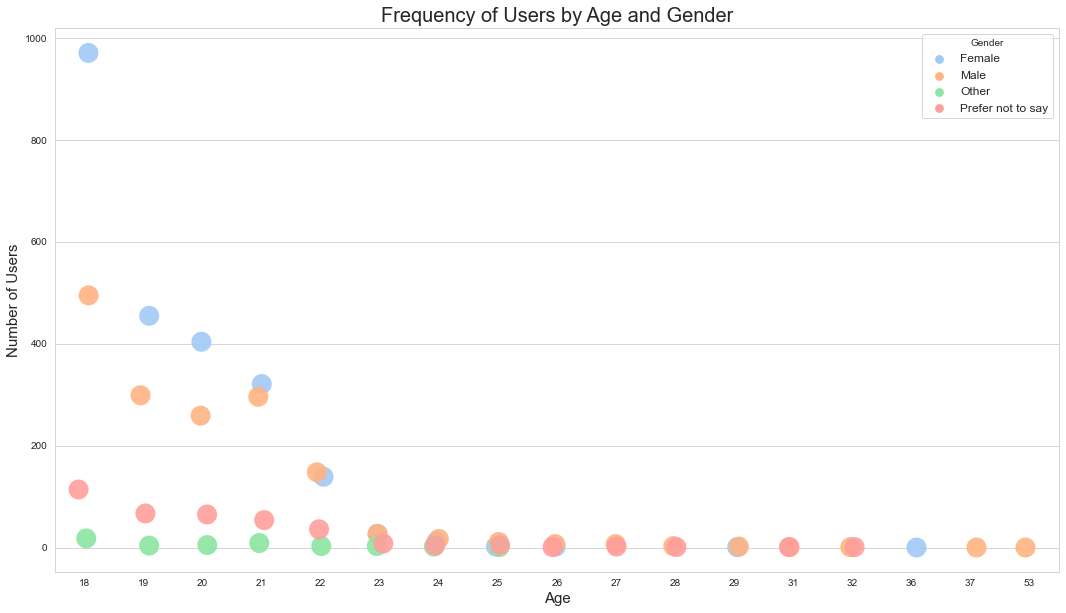

In [21]:
fig = plt.gcf()

# change seaborn plot size
fig.set_size_inches(18, 10)
sns.set_style("whitegrid")
 
# depict scatterplot of frequency of age by gender
p = sns.stripplot(x="age",
                  y="frequency",
                  hue="gender", 
                  data=df,
                  jitter=True,
                  #linewidth = 1,
                  #dodge=True,
                  s = 20,
                  alpha = 0.9,
                  palette ="pastel")

p.set_title("Frequency of Users by Age and Gender", fontsize = 20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Number of Users", fontsize = 15)
plt.legend(title="Gender", fontsize=12)

plt.show()

In [27]:
# pie chart for further analysis of app demographics
fig = px.pie(df[df['age']<=22], 
             values='frequency',
             names='gender', 
             title='Frequency of App Users by Gender')
fig.show()

Text(0.5, 0.98, 'Frequency of Active/Non-active Users by Age and Gender')

<Figure size 1440x1440 with 0 Axes>

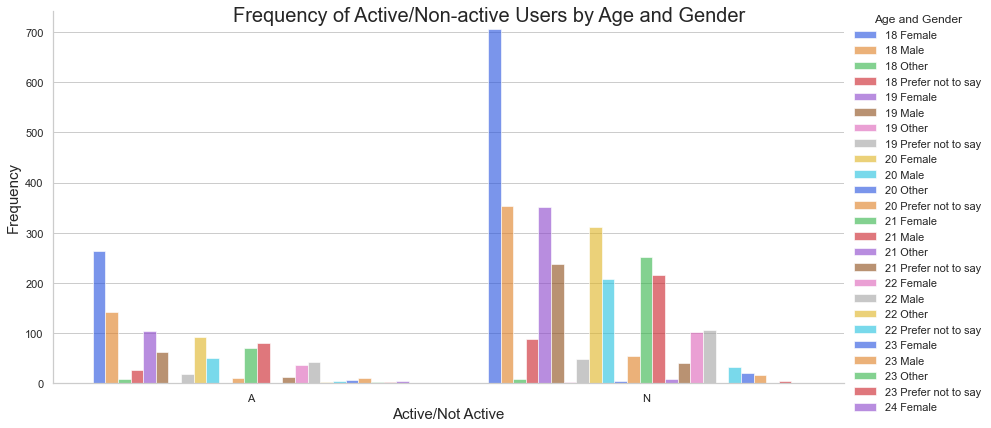

In [23]:
# change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(20,20)

sns.set_theme(style="whitegrid")

#depict catplot of frequency of active/non-active users by age/gender
g = sns.catplot(data=df2[0:48], 
                kind="bar",
                x="activity", 
                y="frequency", 
                hue="age_gender",
                palette="bright", 
                alpha=.6, 
                height=6,
                aspect=2
)

g.set_axis_labels("Active/Not Active", "Frequency", fontsize=15)
g.legend.set_title("Age and Gender")
g.fig.suptitle("Frequency of Active/Non-active Users by Age and Gender", fontsize=20)

In [26]:
# pie chart for further analysis of app demographics of active users
df4 = df2[df2['activity']=='A']
df4 = df4[df4['age'] <= 22]
fig = px.pie(df4, 
             values='frequency',
             names='age_gender', 
             title='Frequency of Active App Users by Age and Gender')
fig.show()

In [28]:
# pie chart for further analysis of app demographics of inactive users
df5 = df2[df2['activity']=='N']
df5 = df5[df5['age'] <= 22]
fig = px.pie(df5, 
             values='frequency',
             names='age_gender', 
             title='Frequency of Nonactive App Users by Age and Gender')
fig.show()